In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [3]:
pd.DataFrame(x)[0]

0     -0.720353
1      0.754388
2     -0.566592
3      1.214365
4      0.294773
         ...   
995    0.553192
996   -1.810283
997    2.718636
998    0.139899
999    0.819485
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

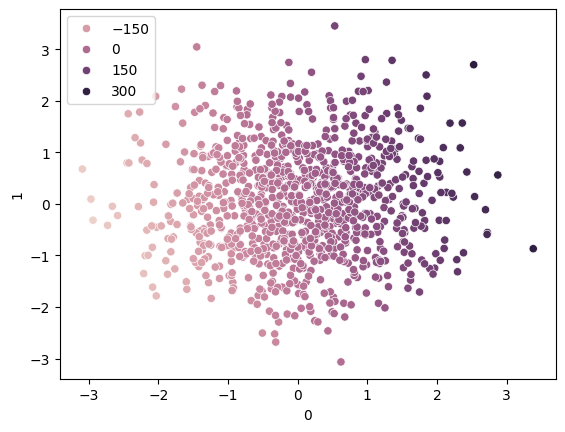

In [5]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [8]:
x_train.shape,x_test.shape

((700, 2), (300, 2))

In [10]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [11]:
svr

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [12]:
svr.fit(x_train,y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [13]:
svr.coef_

array([[95.16938977, 24.33416897]])

In [14]:
y_pred=svr.predict(x_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9990644291302971

In [17]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,0.2,1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel':['linear'],
        'epsilon':[0.01,0.1,0.2,0.3]}

In [18]:
grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.687 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.715 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.703 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.702 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.704 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.687 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.715 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.703 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

,estimator,SVR()
,param_grid,"{'C': [0.1, 0.2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
grid.best_score_

np.float64(0.9990197930646956)

In [22]:
y_pred=grid.best_estimator_.predict(x_test)

In [23]:
r2_score(y_test,y_pred)

0.9991149844301939